<h1>Classify Trees in Satellite Imagery</h1>
<img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/40000/40228/moorhead_tm5_2009253.jpg" width=1000 height=400 alt="esto.nasa.gov"/>

<br>

<h2>Objective</h2>

<ul>
  <li> How to download and pre-process the <b>Trees in Satellite Imagery</b> dataset.</li>
</ul> 

<p>Tree detection can be used for applications such as vegetation management, forestry, urban planning, etc. Tree identifications are very important in terms of impending famine and forest fires.</p>

<br>

<h2>About Dataset</h2>

<p>This dataset is being used for classifying the land with class of trees or not in geospatial images.</p>

Satellite: [Sentinel - 2](https://sentinel.esa.int/web/sentinel/missions/sentinel-2)

<h3>Context</h3>

<p>The content architecture is simple. Each datum has 64x64 resolution and located under <i>tree</i> and <i>notree</i> folders.
Each folder (class) has 5200 images. So the total dataset has 10.4K images.</p>

To download the dataset, you need to have a kaggle account.

 - Dataset download link: [Kaggle](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery/download?datasetVersionNumber=1)
 - Dataset website: [Kaggle Trees in Satellite Imagery](https://www.kaggle.com/datasets/mcagriaksoy/trees-in-satellite-imagery)

<br>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
  <ul>
      <li><a href="https://#unzip_data"> Unzip data</a></li>
      <li><a href="https://#auxiliary"> Imports and Auxiliary Functions </a></li>
      <li><a href="https://#examine_files">Examine Files</a></li>
      <li><a href="https://#Display">Display and Analyze Image With No Trees</a></li>
  </ul>

  <br>

  <p>Estimated Time Needed: <strong>15 min</strong></p>

</div>

<hr>

<br>

<h2 id="unzip_data">Unzip Data</h2>
<p>After downloading the dataset, we can unzip the file.</p>

In [ ]:
!unzip -q archive.zip

<h2 id="auxiliary">Imports and Auxiliary Functions</h2>

<p>The following are the libraries we are going to use for this lab:</p>

In [ ]:
from PIL import Image
from matplotlib.pyplot import imshow
import pandas
import matplotlib.pylab as plt
import os
import glob

<p>We will use this function in the lab to plot:</p>

In [ ]:
def show_data(data_sample, shape = (28, 28)):
  plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
  plt.title('y = ' + data_sample[1])

<h2 id="examine_files">Examine Files </h2>

<p>In this section we are going to get a list of the negative image files, then plot them. Then for the first question your job to do something similar to the positive files.

The path to all the images are stored in the variable  <code>directory</code>.</p>

In [ ]:
directory="/content/Trees_in_Satellite_Imagery"

The images with out the trees are stored in the file <b>Negative</b>

In [ ]:
negative='NoTrees'

We can find the path to the file with all the negative images by  using the function <code>os.path.join</code>. Inputs are the variable directory as well as the variable  <code>negative</code>.

In [ ]:
negative_file_path=os.path.join(directory, negative)
negative_file_path

'/content/Trees_in_Satellite_Imagery/NoTrees'

<h2>Loading the File Path of Each Image</h2>

We need each the path of each image, we can find the all the file in the directory  <code>negative_file_path</code> using the function <code>os.listdir</code>, the result is a list. We print out the first three elements of the list.

In [ ]:
os.listdir(negative_file_path)[0:3]

['SeaLake_1004.jpg', 'SeaLake_239.jpg', 'Industrial_1251.jpg']

<p>We need the full path of the image so we join them as above.</p>

In [ ]:
[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path)][0:3]

['/content/Trees_in_Satellite_Imagery/NoTrees/SeaLake_1004.jpg',
 '/content/Trees_in_Satellite_Imagery/NoTrees/SeaLake_239.jpg',
 '/content/Trees_in_Satellite_Imagery/NoTrees/Industrial_1251.jpg']

<p>In some cases, we may have files of a different type, so we have to ensure it's of type <b>jpg</b>. We have to check the extension using the method <code> endswith()</code>.</p>

In [ ]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


<p>We now have all the tools to create a list with the path to each image file.  We use a List Comprehensions  to make the code more compact.</p>

In [ ]:
negative_files=[os.path.join(negative_file_path,file) for file in  os.listdir(negative_file_path) if file.endswith(".jpg")]
negative_files.sort()
negative_files[0:3]

['/content/Trees_in_Satellite_Imagery/NoTrees/AnnualCrop_1.jpg',
 '/content/Trees_in_Satellite_Imagery/NoTrees/AnnualCrop_100.jpg',
 '/content/Trees_in_Satellite_Imagery/NoTrees/AnnualCrop_1003.jpg']

In [ ]:
positive="Trees"
positive_file_path=os.path.join(directory, positive)
positive_files=[os.path.join(positive_file_path, file) for file in os.listdir(positive_file_path) if file.endswith(".jpg")]
positive_files.sort()
positive_files[0:3]

['/content/Trees_in_Satellite_Imagery/Trees/Forest_1.jpg',
 '/content/Trees_in_Satellite_Imagery/Trees/Forest_10.jpg',
 '/content/Trees_in_Satellite_Imagery/Trees/Forest_100.jpg']

<h2 id="Display">Display and Analyze Image With No Trees</h2>

<p>We can open an image by using the <code>Image</code> Module in the  <b>PIL</b> library, using the function open.</p>

In [ ]:
image1 = Image.open(negative_files[0])

<p>Now, we can plot the images.</p>

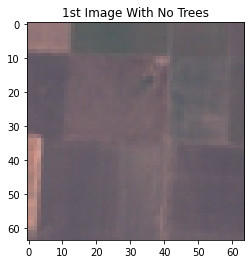

In [ ]:
plt.imshow(image1)
plt.title("1st Image With No Trees")
plt.show()

<p>Let's plot 2nd image with no trees.</p>

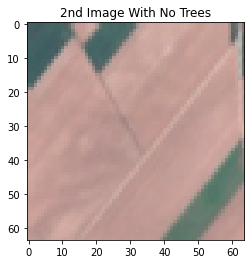

In [ ]:
image2 = Image.open(negative_files[1])
plt.imshow(image2)
plt.title("2nd Image With No Trees")
plt.show()

Plot the first five images for the dataset with trees.

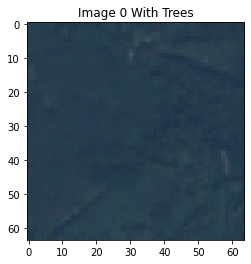

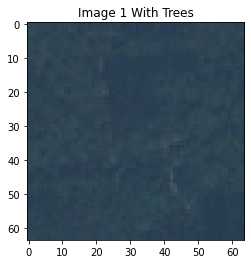

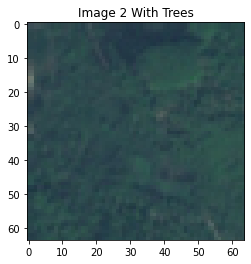

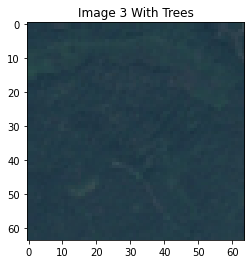

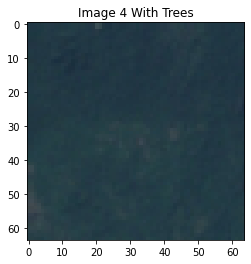

In [ ]:
for i in range(5):
  image_i = Image.open(positive_files[i])
  plt.imshow(image_i)
  plt.title(f"Image {i} With Trees")
  plt.show()

<hr>

<h1>Contact Me<h1>

<p>If you have something to say to me please contact me:<p>

*   Twitter: https://twitter.com/Doguilmak
*   Mail address: doguilmak@gmail.com